In [20]:
import numpy as np

## Ordinary Differential Equations

This is a special type of equation because it consists of the derivatives and can not be solved using traditianal approach. However, in great manner they can describe with higher accuracy most of the physical phenomena and processes. The simplest example can be derived as Equation of motion for mass m hanging on the spring $\begin{equation}
\ddot{x}m + kx = 0
\end{equation}$

### Eulers Method - 1st Order

Every 1st order differential equation can be written as a first derivative set queal to a function of two variables x and y. Assume our problem statement and initial condition is as follows:

\begin{equation}
\left\{\begin{matrix}
y^{'}=f(x,y)\\ 
y(a)={y}_{a}
\end{matrix}\right.
\end{equation}

We apply discretization. Lets consider equidistant points on the interval 
$\begin{equation} [a,b] \end{equation}$



\begin{equation} {x}_{0}, {x}_{1},...,{x}_{n}\epsilon[a,b] , \quad {x}_{0}=a,\quad{x}_{n}=b \end{equation}

where $\begin{equation} k \end{equation}$th point is given by \begin{equation} {x}_{k} = a + k*h \end{equation} and step $\begin{equation} h \end{equation}$ is \begin{equation} h = \frac{b-a}{n} \\
k = 0,...,n\end{equation} 

Now if we utilize Taylor Series expansion arround arbitrary value of x

\begin{equation}
y(x+h) =y(x) + hy^{'}(x) + \frac{1}{2!}h^{2}y^{''}(x) + \frac{1}{3!}h^{3}y^{'''}(x)+...
\end{equation}

and consider just the first order terms, assuming rest of them as an error

\begin{equation} y(x+h) \approx y(x) +  hy^{'}(x) \end{equation}

Plugging $\begin{equation} y^{'}=f(x,y) \end{equation}$ from our problem statement we obtain

\begin{equation} y(x+h) \approx y(x) +  hf(x,y) \end{equation}

<font color = 'steelblue'><b>Example 1:</font>

\begin{equation}
\left\{\begin{matrix}
y^{'}=y-2x{y}^{3}\\ 
y(1)=1
\end{matrix}\right.
\end{equation}

If we take step $\begin{equation} h = 2 \end{equation}$ and assign consecutive solutions to $\begin{equation} {u}_{0}, {u}_{1}, ..., {u}_{n} \end{equation}$ we have

\begin{equation}
{u}_{k}={u}_{k-1} + hf({x}_{k-1}, {u}_{k-1})
\end{equation}

also the knots are \begin{equation} {x}_{0} = 1 \\ {x}_{1} = 1 + 1*2 = 3 \\ \vdots\end{equation}

Solution

\begin{equation}
{u}_{0} = {x}_{0} = 1 \\
{u}_{1} = {u}_{0} + hf({x}_{0}, {y}_{0}) = {u}_{0} + h(1 - 2*1*{1}^{3}) = 1 + 2*(-1) = -1 \\
{u}_{2} = {u}_{1} + 2*[-1 - 2*3*{(-1)}^{3}] = 9 \\
\vdots
\end{equation}

### Algorithm 

In [21]:
def f1(x,y):
    return y-2*x*y**3

def Euler(f, x0, y0, h, n):
    '''
    f - function f(x,y) = y'
    x0 - boundary condition
    f(x0) - boundary function value
    h - step
    n - intervals'''
    X = []
    Y = []
    
    X.append(x0)
    Y.append(y0)
    
    for k in range(1,n):
                
        x = X[0] + k * h #calculate new x 
        X.append(x) #store x 
        
        y = Y[k-1] #pick previous y

        u = y + h * f(X[k-1],y) #calculate uk
        Y.append(u) #store uk
        
    return X,Y

#### Comparison to analytical solution

In [22]:
solution = Euler(f=f1, x0=1, y0=1, h=2, n=3)
count = 0
for i,j in zip(solution[0], solution[1]):
    print('x{0} = {1}'.format(count,i), ', u{0} = {1}'.format(count,j))
    count += 1 

x0 = 1 , u0 = 1
x1 = 3 , u1 = -1
x2 = 5 , u2 = 9


<font color = 'steelblue'><b>Example 2:</font>

Solve the following differential equation 
\begin{equation}
{y}^{'} - y = {e}^{x}
\end{equation}

To solve it we add $\begin{equation} y \end{equation}$ to both sides of equation obtaining
\begin{equation}
{y}^{'} = {e}^{x} + y
\end{equation}

In [23]:
def f2(x,y):
    return np.exp(x) + y 

We also need to assume starting conditions, therefore

\begin{equation}
\left\{\begin{matrix}
{y}^{'} = {e}^{x} + y\\ 
y(0)=0
\end{matrix}\right.
\end{equation}

In [24]:
solution = Euler(f=f2, x0=0, y0=0, h=0.1, n=20)
count = 0
for i,j in zip(solution[0], solution[1]):
    print('x{0} = {1}'.format(count,round(i,4)), ', u{0} = {1}'.format(count,j))
    count += 1 

x0 = 0 , u0 = 0
x1 = 0.1 , u1 = 0.1
x2 = 0.2 , u2 = 0.2205170918075648
x3 = 0.3 , u3 = 0.3647090768043383
x4 = 0.4 , u4 = 0.5361658652423724
x5 = 0.5 , u5 = 0.7389649215307367
x6 = 0.6 , u6 = 0.9777335407538232
x7 = 0.7 , u7 = 1.2577187748682566
x8 = 0.8 , u8 = 1.58486592310213
x9 = 0.9 , u9 = 1.96590660826159
x10 = 1.0 , u10 = 2.408457580203444
x11 = 1.1 , u11 = 2.9211315210696926
x12 = 1.2 , u12 = 3.5136612755713053
x13 = 1.3 , u13 = 4.197039095402091
x14 = 1.4 , u14 = 4.983672671704224
x15 = 1.5 , u15 = 5.887559935559114
x16 = 1.6 , u16 = 6.924484836148832
x17 = 1.7 , u17 = 8.112236562203226
x18 = 1.8 , u18 = 9.470854957596268
x19 = 1.9 , u19 = 11.02290519979719


Since we know solution to this problem $\begin{equation} {y}^{'} = x{e}^{x} + c{e}^{x} \end{equation}$  we can compare algorithm results with exact reusults

In [25]:
def f2_exact(x):
    dy = x*np.exp(x) +  np.exp(x)
    y = dy - np.exp(x)
    return y

In [26]:
X = solution[0]
Y = solution[1]
Y_exact = list((map(f2_exact, X))) #use f2_exact on the whole array 

([<matplotlib.lines.Line2D at 0x18c8a5ec550>],
 <matplotlib.legend.Legend at 0x18c8a6f4320>)

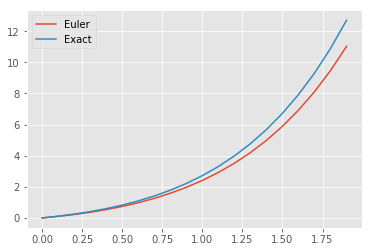

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X,Y, label = 'Euler'), plt.legend()
plt.plot(X, Y_exact, label = 'Exact'), plt.legend()

#### Commentary 

* It is a single step, first order method, p=1
* In early stage Eulers method seems to fit well exact solution near the initial condition
* The error is continuously growing for higher values
* The smaller step h the better accuracy might be obtained - up to some point. 
* Possibly remedy might be using higher order terms from Taylor series however then we have to differentiate to obtain higher order derivatives $\begin{equation} {y}^{'}, {y}^{''},... \end{equation}$
* It can be avoided by using Runge-Kutta methods, which is also based on truncated Taylor series but does not need to compute higher order derivatives


### Second-Order Runge-Kutta methods

This group of methods considers truncating Taylor series up to $\begin{equation} 2 \end{equation}$nd term. 

We consider the following formula,
\begin{equation} y(x+h) = y(x) + {c}_{0}f(x,y)h+{c}_1f(x,y)f[x+ph, y+qhf(x,y)]h \end{equation}


with an attempt to find the parameters $\begin{equation} {c}_{0}, {c}_{c1}, p, q \end{equation}$ matching it to the Taylor series. It is possible with the following realationships:

\begin{equation} {c}_{0} + {c}_{1} = 1 \quad {c}_{1}p=\frac{1}{2} \quad {c}_{1}q = \frac{1}{2} \end{equation}





We have 3 equations with 4 unknowns. Therefore one of the parateres can be freely assigned. 
Most popular choices of the parameters are listed below

| c0  | c1 | p   | q   | Method                  |
|-----|--------|-----|-----|-------------------------|
| 0   | 1      | 1/2 | 1/2 | Modified Euler's method |
| 1/2 | 1/2    | 1   | 1   | Heun's                  |
| 1/3 | 2/3    | 3/4 | 3/4 | Ralston's method        |

Therefore Heun method can be written as:

\begin{equation}
{u}_{k} = {u}_{k-1} + hf[{x}_{k-1} + \frac{h}{2}, {u}_{k-1}+\frac{h}{2}f({x}_{k-1},{u}_{k-1})]
\end{equation}

#### Euler vs Heun

In [28]:
def Heun(f, x0, y0, h, n):
    '''
    f - function f(x,y) = y'
    x0 - boundary condition
    f(x0) - boundary function value
    h - step
    n - intervals'''
    X = []
    Y = []
    
    X.append(x0)
    Y.append(y0)
    
    for k in range(1,n):
                
        x = X[0] + k * h #calculate new x 
        X.append(x) #store x 
        
        y = Y[k-1] #pick previous y

        u = y + h*f2(X[k-1] + h*0.5,y + h*0.5*f2(X[k-1],y))
        Y.append(u) #store uk
        
    return X,Y

In [29]:
solution_Heun = Heun(f=f2, x0=0, y0=0, h=0.1, n=20)
count = 0
for i,j in zip(solution_Heun[0], solution_Heun[1]):
    print('x{0} = {1}'.format(count,round(i,4)), ', u{0} = {1}'.format(count,j))
    count += 1 


x0 = 0 , u0 = 0
x1 = 0.1 , u1 = 0.11012710963760242
x2 = 0.2 , u2 = 0.24339973501275722
x3 = 0.3 , u3 = 0.4034662626486717
x4 = 0.4 , u4 = 0.5944862691239879
x5 = 0.5 , u5 = 0.82119766941923
x6 = 0.6 , u6 = 1.0889923328484894
x7 = 0.7 , u7 = 1.404001204700923
x8 = 0.8 , u8 = 1.7731900963931397
x9 = 0.9 , u9 = 2.204467446349481
x10 = 1.0 , u10 = 2.706805509703546
x11 = 1.1 , u11 = 3.2903766091710303
x12 = 1.2 , u12 = 3.9667062742226973
x13 = 1.3 , u13 = 4.748845313375948
x14 = 1.4 , u14 = 5.651563107688216
x15 = 1.5 , u15 = 6.691564685346584
x16 = 1.6 , u16 = 7.887734440918741
x17 = 1.7 , u17 = 9.261409702055168
x18 = 1.8 , u18 = 10.83668772533017
x19 = 1.9 , u19 = 12.640770126072086


([<matplotlib.lines.Line2D at 0x18c8a756ef0>],
 <matplotlib.legend.Legend at 0x18c8a765da0>)

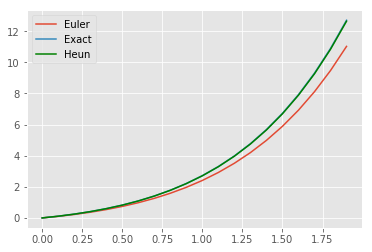

In [30]:
Y_Heun = solution_Heun[1]

import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X,Y, label = 'Euler'), plt.legend()
plt.plot(X, Y_exact, label = 'Exact'), plt.legend()
plt.plot(X, Y_Heun, label = 'Heun', c = 'green'), plt.legend()

#### Commentary

* As we can see Heun's method provides much better solution curve in comparison to 1st Order Quler Method. (Blue line is covered by green)

### Fourth-Order Runge-Kutta Method

This method has no unique form due to the choice of the parameters. However, the most popular one is given by following operations:

\begin{equation} {K}_{0} = hf(x,y) \\
{K}_{1} = hf(x+ \frac{h}{2}, y + \frac{{K}_{0}}{2}) \\
{K}_{2} = hf(x + \frac{h}{2}, y + \frac{{K}_{1}}{2}) \\ 
{K}_{3} = hf(x+h, y+{K}_{2}) \\
{u}_{k}={u}_{k-1} + \frac{1}{6}({K}_{0}+2{K}_{1}+2{K}_{2}+{K}_{3})
\end{equation}

This method can yield better accuracy of the solution curve in comparison to $\begin{equation} 2 \end{equation}$nd order methods however it cost more computational resources (=time) because it requires evaluating value of the function at ech step. 

#### Implementation

In [33]:
def RunKutK(f,x,y,h):
    K0 = h*f(x,y)
    K1 = h*f(x + h/2.0, y + K0/2.0)
    K2 = h*f(x + h/2.0, y + K1/2.0)
    K3 = h*f(x + h, y + K2)
    return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0


def RunKut4(f, x0, y0, h, n):
    '''
    f - function f(x,y) = y'
    x0 - boundary condition
    f(x0) - boundary function value
    h - step
    n - intervals'''
    X = []
    Y = []
    
    X.append(x0)
    Y.append(y0)
    
    for k in range(1,n):
                
        x = X[0] + k * h #calculate new x 
        X.append(x) #store x 
        
        y = Y[k-1] #pick previous y

        u = y + RunKutK(f, X[k-1], y, h)
        Y.append(u) #store uk
        
    return X,Y

In [49]:
def f3(x,y):
    return x + y

def f3_exact(x,y):
    return 2*np.exp(x)-x-1
    



#def f3(x,y):
 #   return np.sin(x)

#def f3_exact(x,y):
    

In [50]:
solution_Kut = RunKut4(f=f3, x0=0, y0=1, h=0.1, n=20)
Y_kut = solution_Kut[1]

In [51]:
Y_kut

[1,
 1.1103416666666668,
 1.242805141701389,
 1.3997169941250756,
 1.5836484801613715,
 1.7974412771936765,
 2.0442359241838663,
 2.327503253193554,
 2.651079126584631,
 3.019202827560142,
 3.436559488270332,
 3.9083269801179634,
 4.44022773555612,
 5.038586020027671,
 5.710391227242331,
 6.463367831270763,
 7.306052695558702,
 8.247880512594524,
 9.299278229337851,
 10.471769403449171]

([<matplotlib.lines.Line2D at 0x18c8a821be0>],
 <matplotlib.legend.Legend at 0x18c8a831a90>)

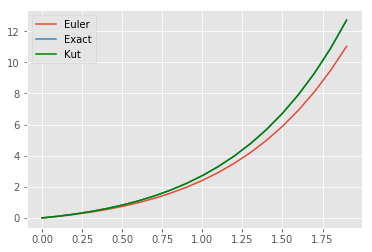

In [37]:
Y_Heun = solution_Heun[1]

import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X,Y, label = 'Euler'), plt.legend()
plt.plot(X, Y_exact, label = 'Exact'), plt.legend()
plt.plot(X, Y_kut, label = 'Kut', c = 'green'), plt.legend()